Extracting and load ZIP File

In [26]:
import zipfile
import os
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract the ZIP file
zip_path = "rice+cammeo+and+osmancik.zip"
extract_folder = "rice_dataset"

# Load the ARFF dataset
arff_file = next(f for f in os.listdir("rice_dataset") if f.endswith(".arff"))
data, _ = arff.loadarff(f"rice_dataset/{arff_file}")
df = pd.DataFrame(data)

# Convert the class label (target) from byte format to string
df[df.columns[-1]] = df[df.columns[-1]].str.decode('utf-8')

Data Preprocessing

In [27]:
# Split features and labels
X = df.iloc[:, :-1].values
y = pd.factorize(df.iloc[:, -1])[0]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Hyperparameter Tuning with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


Model Training and Prediction

In [29]:
# Train an SVM classifier with best parameters
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

Model Evaluation - Confusion Matrix

SVM Accuracy: 0.9291
Precision: 0.9292
Recall: 0.9291
F1-score: 0.9292

Confusion Matrix:



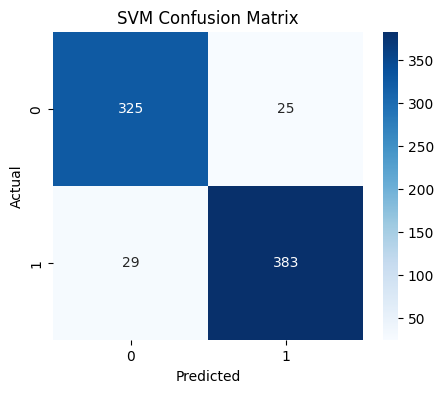

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()